## Reinforcement Learning (Delta Rule)

##### *Packages and Configurations*

In [1]:
using Plots, LaTeXStrings
cd(dirname(@__FILE__))
# ω -> ω + ϵδu
# δ = r - ν
# ν : The expected reward (in this problem it's either 1 or 0), r : The actual reward,
# ϵ : Learning rate (= 0.05), u : presence or absence of the stimuli(in this problem it always equals 1).
# 200 trials, ω₀ = 0.0, α : probability of recieving the reward.

In [2]:
function DeltaRule(trials, ω, ϵ, u, r, ν , ωList)
    for i in 1:trials
        ν = ω * u
        δ = r - ν
        ω += ϵ * δ * u
        push!(ωList, ω)
    end
    return ωList
end

DeltaRule (generic function with 1 method)

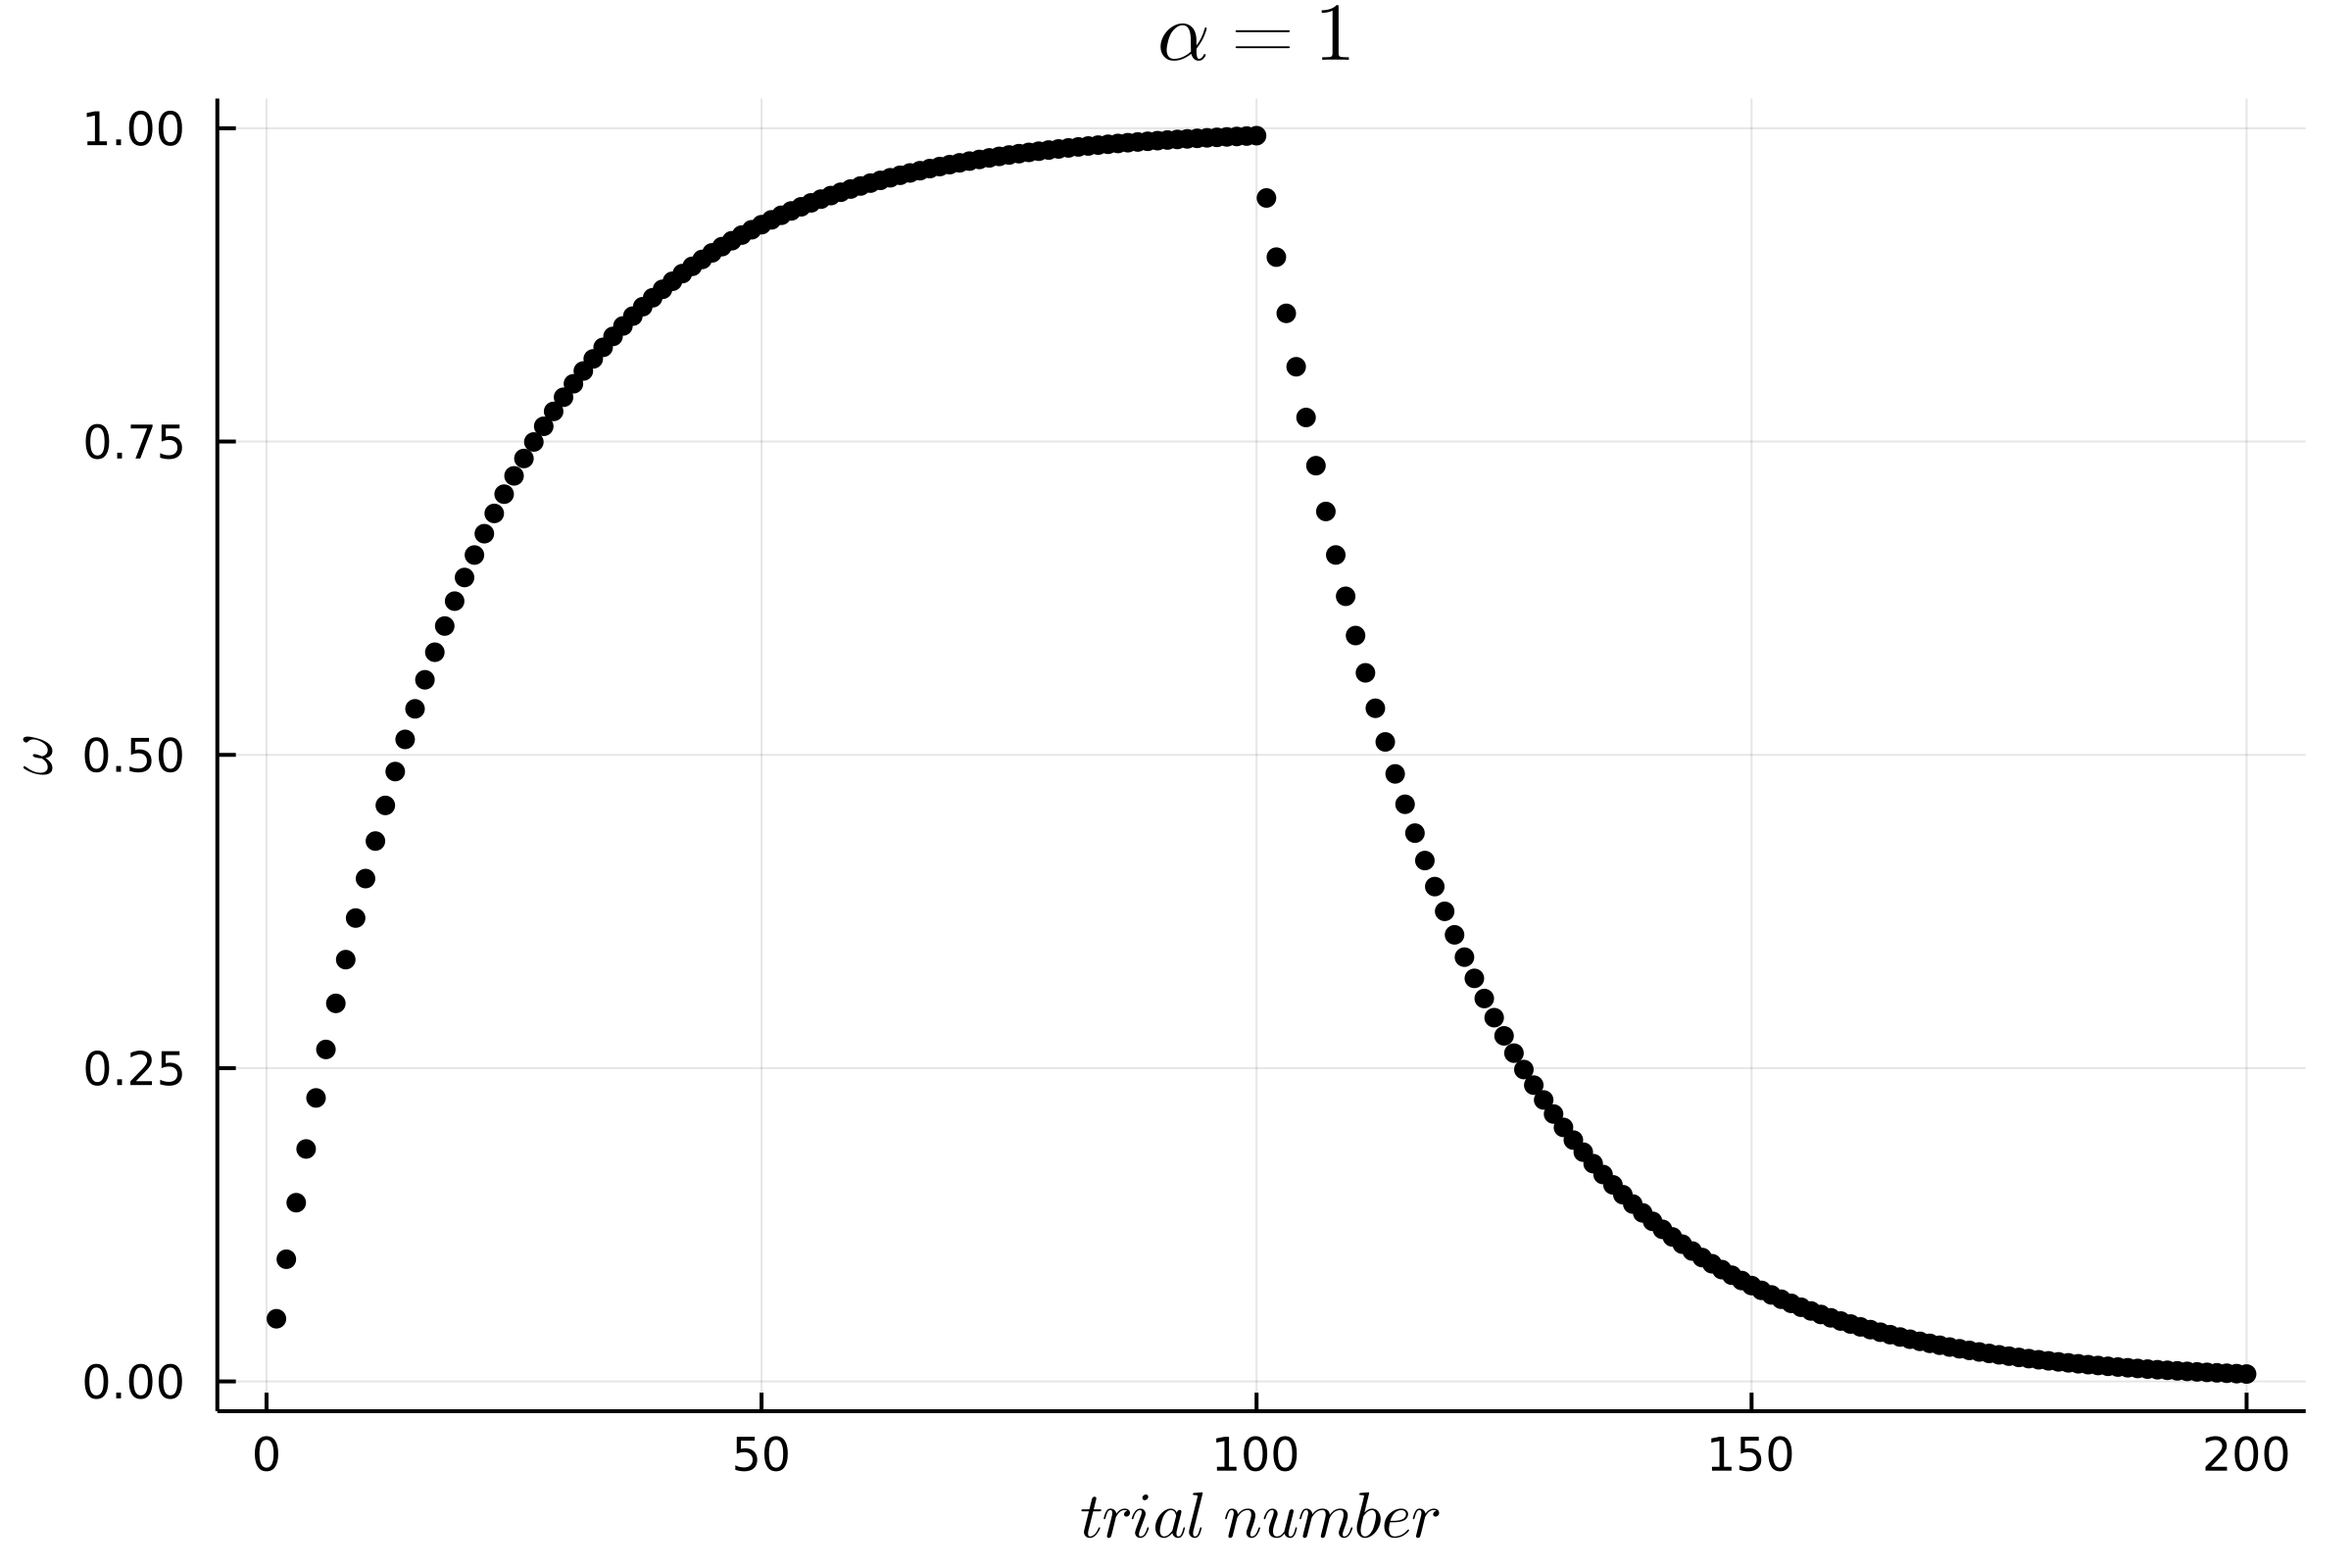

In [12]:
ϵ=0.05; ω₀=0.0; u=1.0; trials=200;
ν = 0
ω = ω₀
ωList=[]

ωList = DeltaRule(trials/2, ω, ϵ, u, 1, ν , ωList)
ωList = DeltaRule(trials/2, ωList[end], ϵ, u, 0, ν , ωList)
scatter(ωList, ms=3, color=:black, title=L"\alpha=1", xlabel=L"trial\ number", ylabel=L"\omega", dpi=400, legend=false)
savefig("../../Fundamentals-of-Neuroscience_Fall1400/Reinforcement_Learning/Figs/A.pdf")

##### *α =1*

In [3]:
function DeltaRuleP(trials, ω, ϵ, u, ν , ωList, α)
    for i in 1:trials
        if α > rand()
            r=1
            ν = ω * u
            δ = r - ν
            ω += ϵ * δ * u
            push!(ωList, ω)
        else 
            r=0
            ν = ω * u
            δ = r - ν
            ω += ϵ * δ * u
            push!(ωList, ω)
        end
    end
    return ωList
end

DeltaRuleP (generic function with 1 method)

In [4]:
ϵ=0.05; ω₀=0.0; u=1.0; trials=200
ν = 0
ω = ω₀
ωList=[]

ωList = DeltaRuleP(trials, ω, ϵ, u,  ν , ωList, 1)
#ωList = [ωList1 ; ωList2]
scatter(ωList, ms=3, color=:black, title=L"\alpha=1.0", xlabel=L"trial\ number", ylabel=L"\omega", dpi=400, legend=false)
savefig("../../Fundamentals-of-Neuroscience_Fall1400/Reinforcement_Learning/Figs/B.1.pdf")

##### *α = 0.25*

In [5]:
ϵ=0.05; ω₀=0.0; u=1.0; trials=200
ν = 0
ω = ω₀
ωList=[]

ωList = DeltaRuleP(trials, ω, ϵ, u,  ν , ωList, 0.25)
#ωList = [ωList1 ; ωList2]
scatter(ωList, ms=3, color=:black, title=L"\alpha=0.25", xlabel=L"trial\ number", ylabel=L"\omega", dpi=400, legend=false)
savefig("../../Fundamentals-of-Neuroscience_Fall1400/Reinforcement_Learning/Figs/B.2.pdf")

##### *α = 0.75*

In [6]:
ν = 0
ω = ω₀
ωList=[]
ωList = DeltaRuleP(trials, ω, ϵ, u,  ν , ωList, 0.75)
scatter(ωList, ms=3, color=:black, title=L"\alpha=0.75", xlabel=L"trial\ number", ylabel=L"\omega", dpi=400, legend=false)
savefig("../../Fundamentals-of-Neuroscience_Fall1400/Reinforcement_Learning/Figs/B.3.pdf")

##### *α = 0.5*

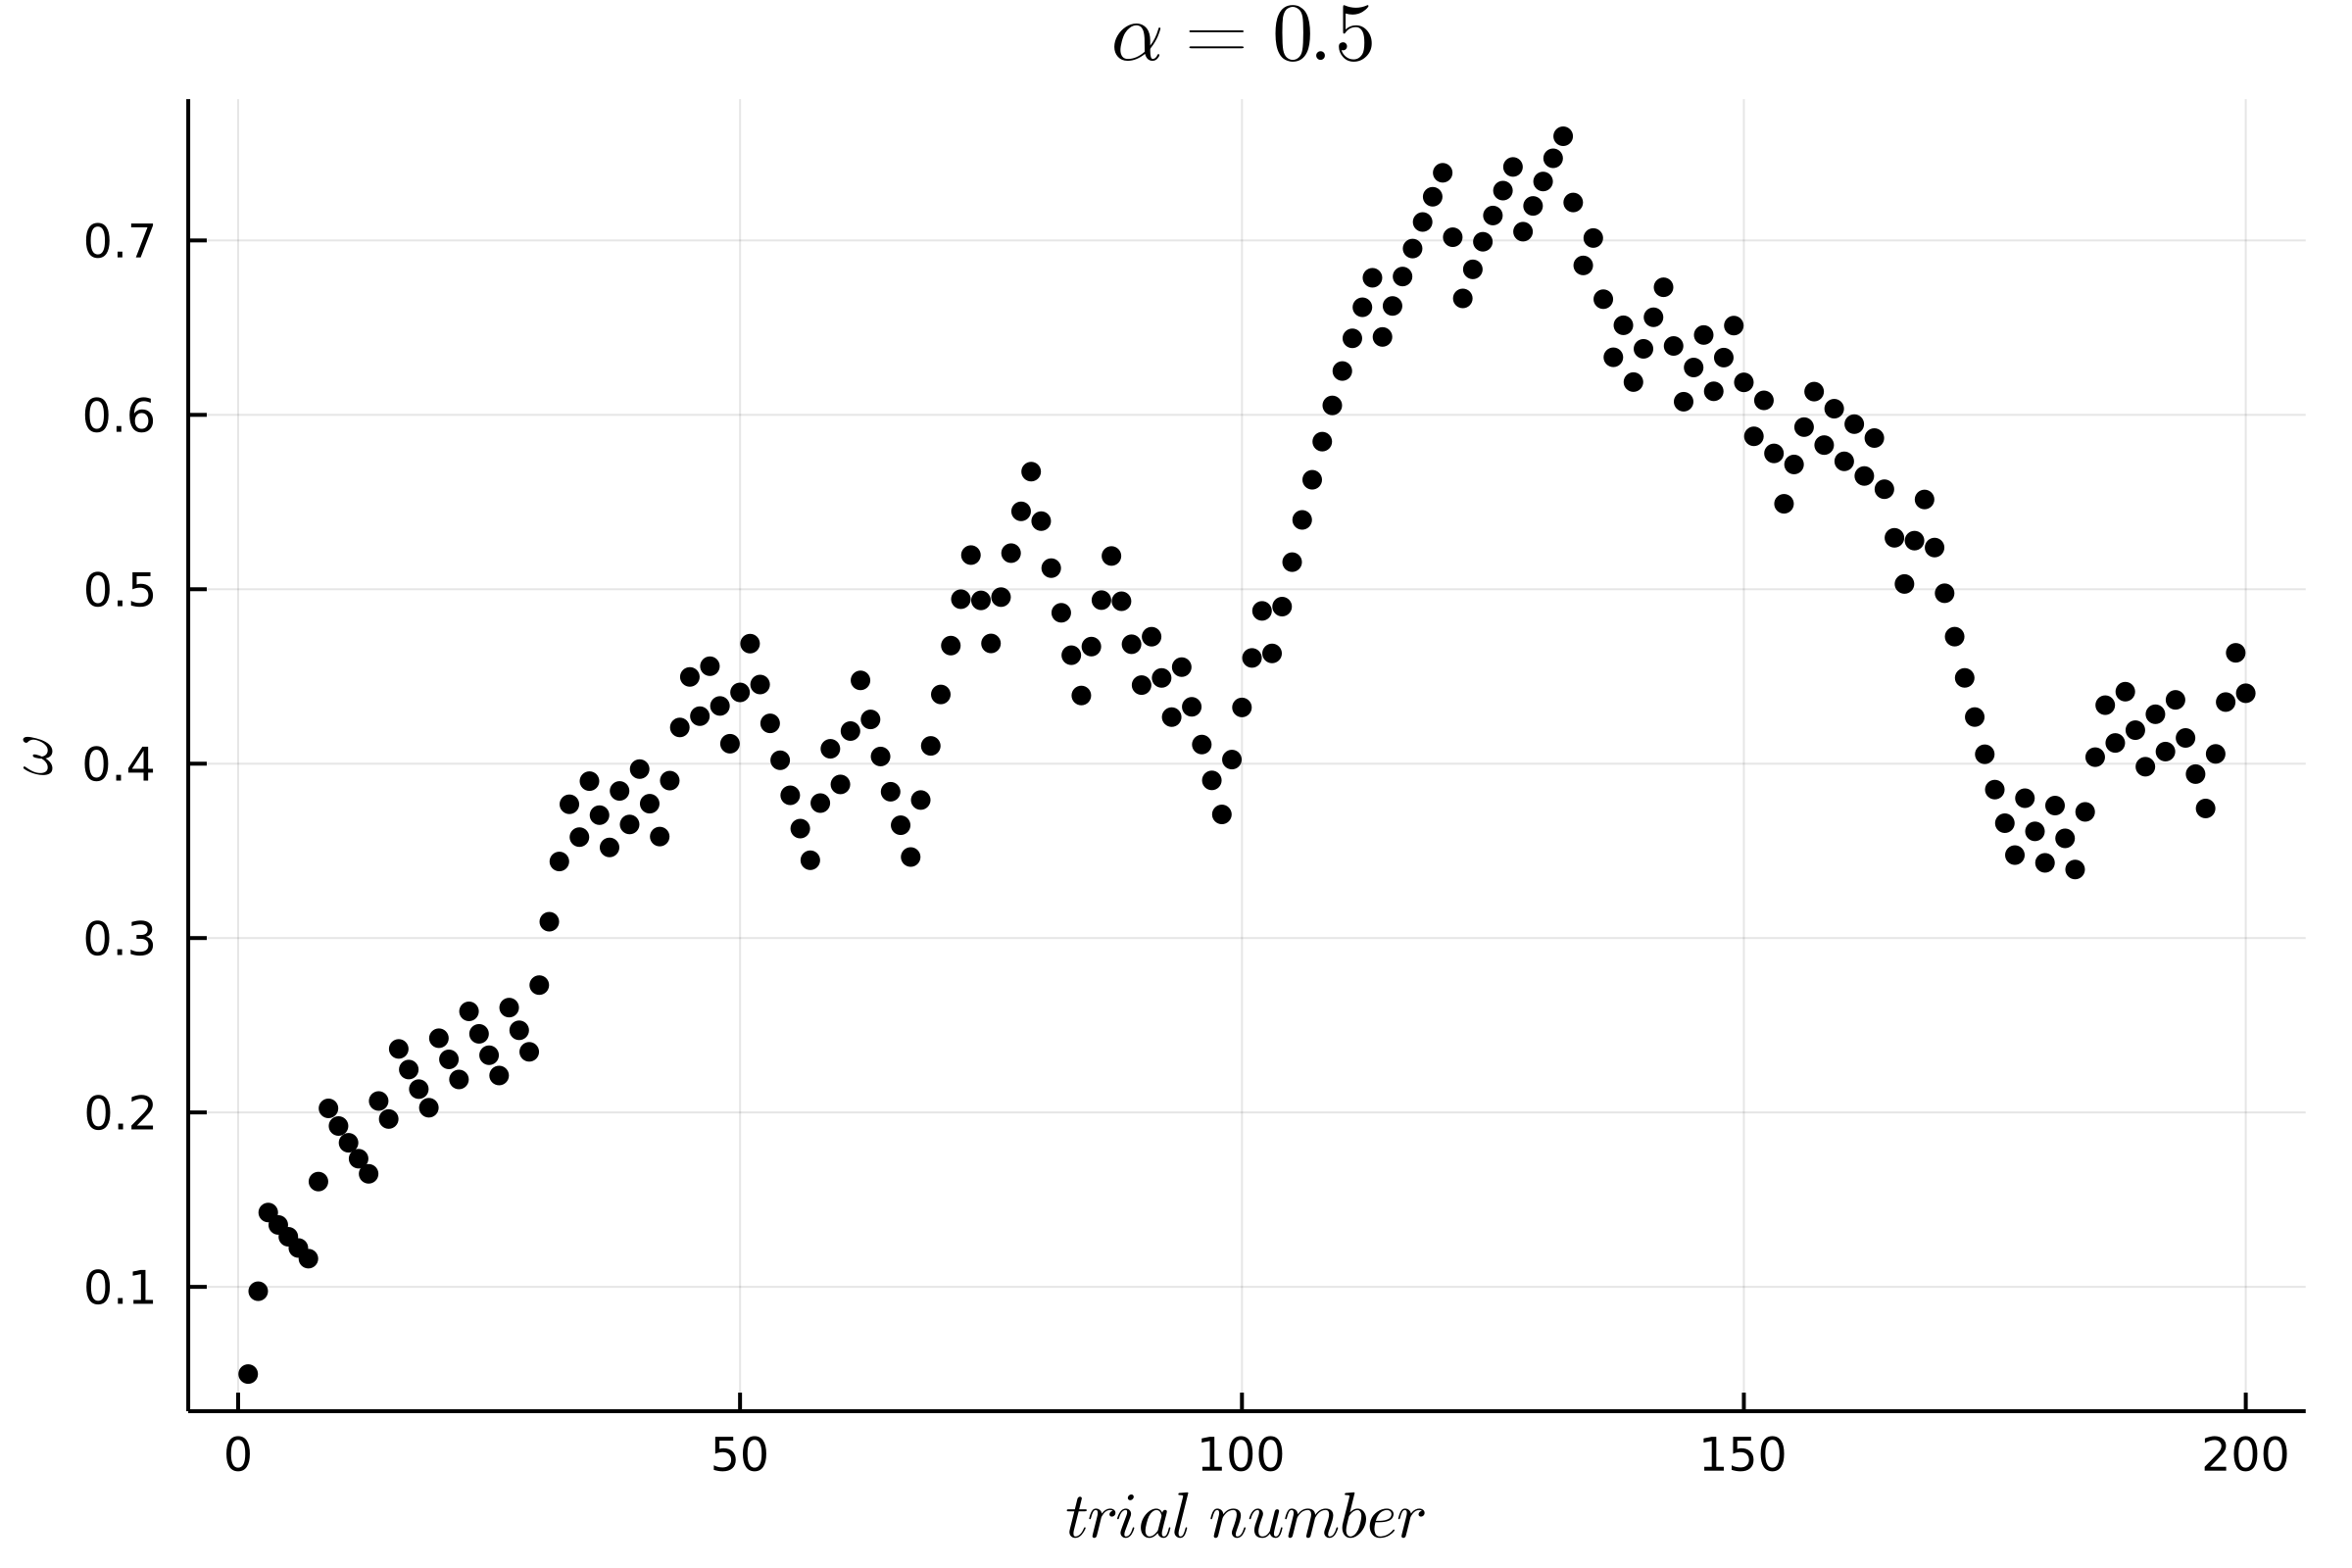

In [7]:
ϵ=0.05; ω₀=0.0; u=1.0; trials=200;
ν = 0
ω = ω₀
ωList = []
ωList = DeltaRuleP(trials, ω, ϵ, u,  ν , ωList, 0.5)
p1=scatter(ωList, ms=3, color=:black, title=L"\alpha=0.5", xlabel=L"trial\ number", ylabel=L"\omega", dpi=400, legend=false)



##### *reward = 0.5*

In [10]:
ϵ=0.05; ω₀=0.0; u=1.0; trials=200;
ν = 0
ω = ω₀
ωList=[]

ωList = DeltaRule(trials, ω, ϵ, u, 0.5, ν , ωList)
p2 = scatter(ωList, ms=3, color=:black, title=L"reward=0.5", xlabel=L"trial\ number", ylabel=L"\omega", dpi=400, legend=false)
plot(p1, p2, layout=(1,2))
savefig("../../Fundamentals-of-Neuroscience_Fall1400/Reinforcement_Learning/Figs/E.pdf")